# [R Cookbooks 2e Ch11](https://rc2e.com/linearregressionandanova)


- lm: $y_i = \beta_0 + \beta_i x_i + \varepsilon_i $

> The beauty of R is that anyone can build these linear models.
> The horror of R is that anyone can build these models.

So, check your regression summary!!

1. **Is the model statistically significant?**
1. **Are the coefficients significant?**
1. **Does the model fit the data well?**
1. **Does the data satisfy the assumptions behind linear regression?**
1. **Is the model useful to explain the observables?**

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
set.seed(42)
N <- 100

x <- rnorm(N)
epsilon <- rnorm(N,mean=0,sd=5)
y <- 5 + 15*x + epsilon
 
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      4.558       15.136  


In [3]:
tibble(x1=x,y1=y) %>% lm(y1~x1,.)


Call:
lm(formula = y1 ~ x1, data = .)

Coefficients:
(Intercept)           x1  
      4.558       15.136  


In [95]:
set.seed(42)
(
    map2(
            c(0,3,-3,0),
            c(1,2,1,3),
            \(m,s) rnorm(N,mean=m,sd=s)
    ) 
    %>% (\(x){names(x)=unlist(str_split('u,v,w,e',','));x}) 
    %>% as_tibble     
    %>% mutate(y= 5 + 4 * u + 3 * v + 2 * w + e) 
    %>% lm(y~u+v+w,data=.)
    -> m 
)#%>%str;
m


Call:
lm(formula = y ~ u + v + w, data = .)

Coefficients:
(Intercept)            u            v            w  
      4.770        4.173        3.013        1.905  



Call:
lm(formula = y ~ u + v + w, data = .)

Coefficients:
(Intercept)            u            v            w  
      4.770        4.173        3.013        1.905  


In [96]:
m%>%summary


Call:
lm(formula = y ~ u + v + w, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3832 -1.7601 -0.3115  1.8565  6.9840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.7703     0.9691   4.922 3.55e-06 ***
u             4.1733     0.2597  16.069  < 2e-16 ***
v             3.0132     0.1484  20.311  < 2e-16 ***
w             1.9052     0.2665   7.150 1.71e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.66 on 96 degrees of freedom
Multiple R-squared:  0.8851,	Adjusted R-squared:  0.8815 
F-statistic: 246.6 on 3 and 96 DF,  p-value: < 2.2e-16


In [97]:
summary(m)$coef[,'Estimate']

(Intercept)           u           v           w 
   4.770280    4.173262    3.013244    1.905167

In [98]:
m %>% anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
u,1,1776.2425,1776.242486,251.00458,1.553283e-28
v,1,3097.0811,3097.081118,437.65507,1.556967e-37
w,1,361.7415,361.741525,51.11846,1.707060e-10
Residuals,96,679.3473,7.076534,NA,NA


In [99]:
#m%>%coefficients
m%>%coef

(Intercept)           u           v           w 
   4.770280    4.173262    3.013244    1.905167

In [100]:
m%>%confint

,2.5 %,97.5 %
(Intercept),2.846622,6.693939
u,3.657753,4.688771
v,2.718762,3.307726
w,1.376234,2.434101


In [101]:
#m%>%residuals%>%str
m%>%resid%>%str

 Named num [1:100] -0.5675 2.288 0.0972 2.1474 -0.7169 ...
 - attr(*, "names")= chr [1:100] "1" "2" "3" "4" ...


In [102]:
m%>%vcov

,(Intercept),u,v,w
(Intercept),0.93916517,0.033111865,-0.071239444,0.221973747
u,0.03311187,0.067446266,-0.001623653,0.010204066
v,-0.07123944,-0.001623653,0.022009122,-0.003028118
w,0.22197375,0.010204066,-0.003028118,0.071004935


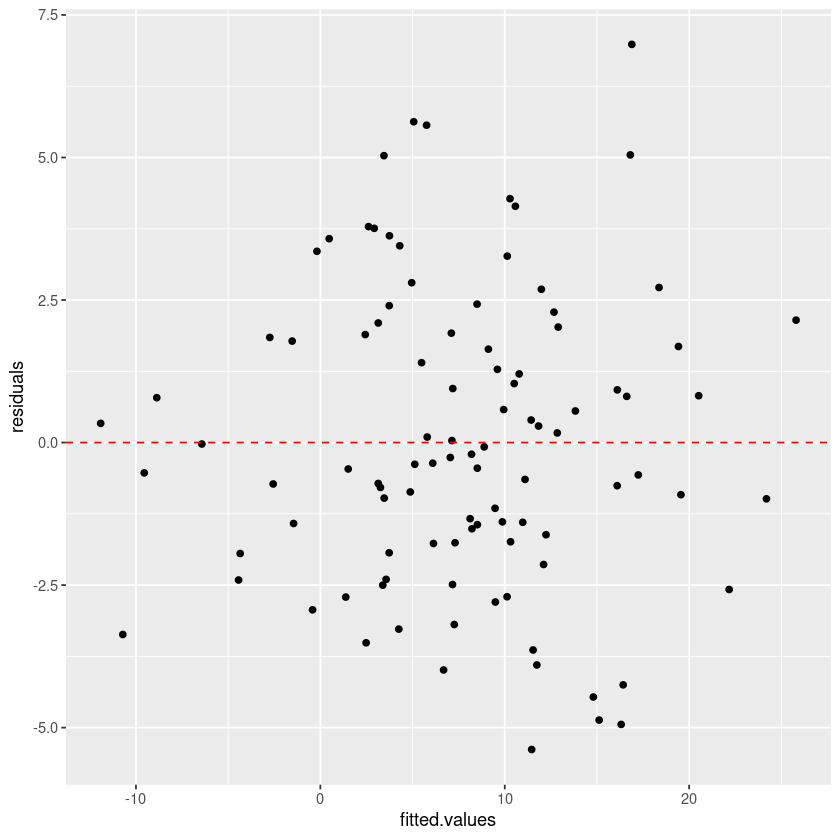

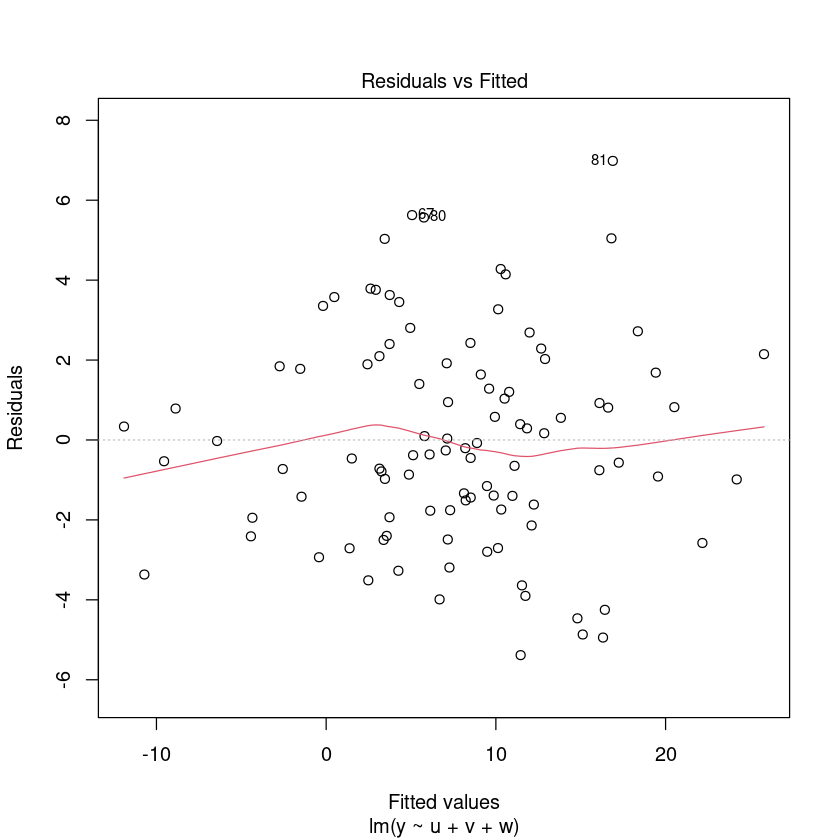

In [103]:

(
    with(m,tibble(fitted.values,residuals))
    %>% ggplot(aes(fitted.values,residuals)) 
    + geom_point()
    + geom_hline(yintercept = 0,col='red',lty=2)
)
plot(m,which=1)

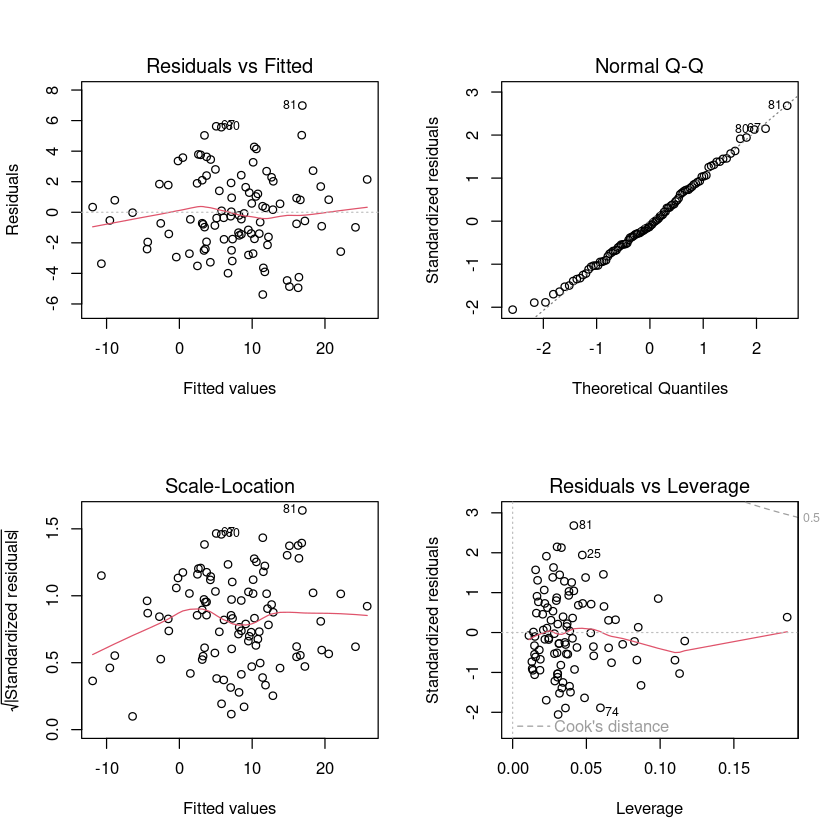

In [104]:
par(mfrow = c(2,2))
plot(m)

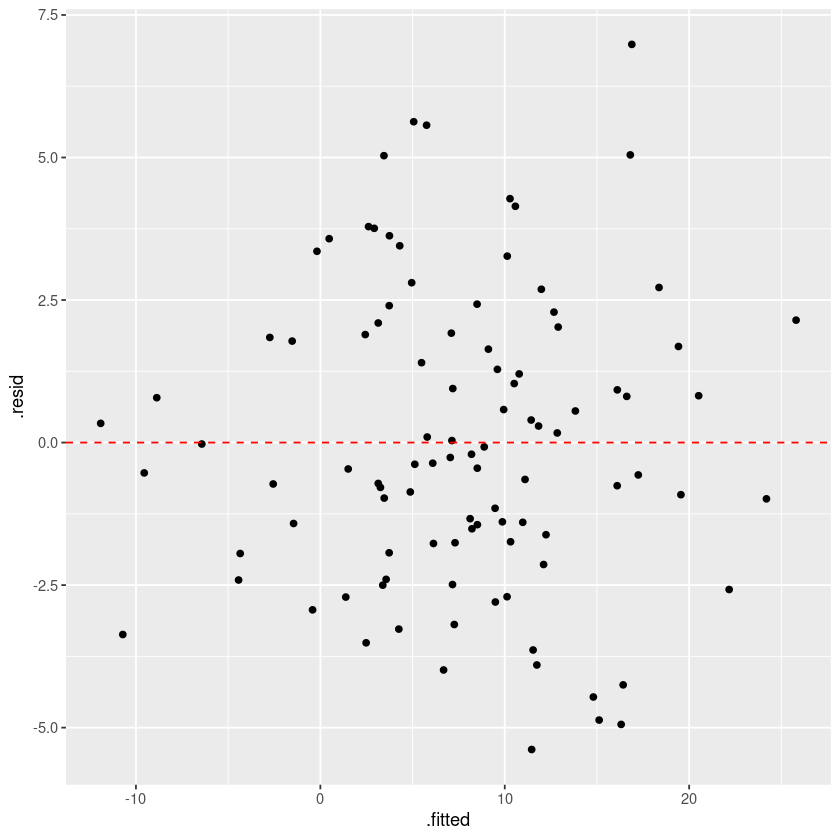

In [105]:
library(broom)
(
    m 
    %>% augment 
    %>% ggplot(aes(.fitted,.resid)) 
    + geom_point()  
    + geom_hline(yintercept = 0,col='red',lty=2)
)

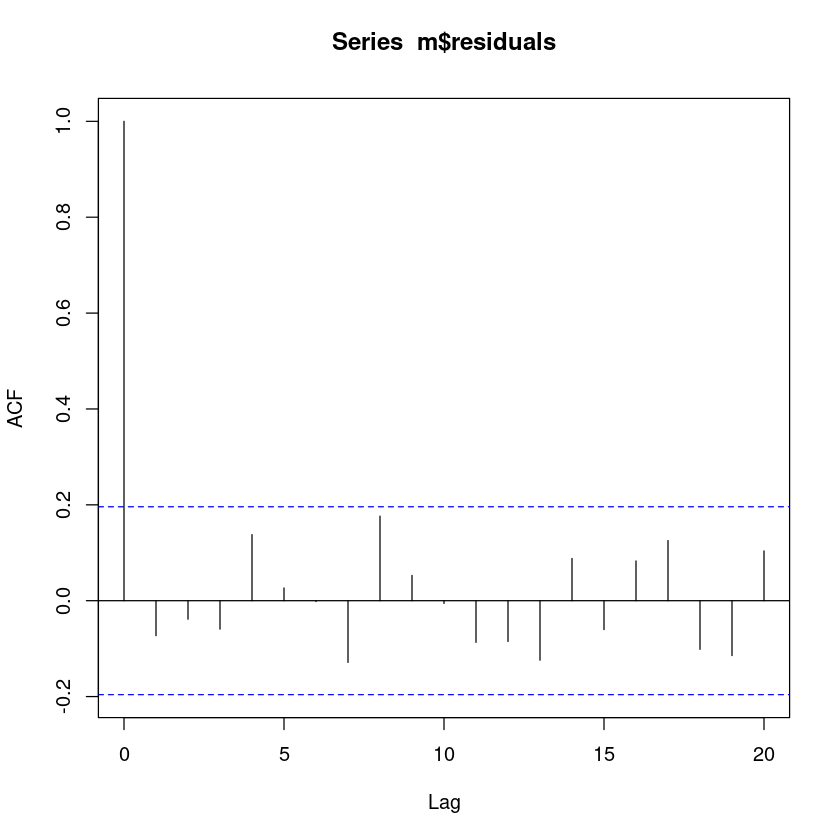

In [119]:
acf(m$residuals)

# See also
- <https://rpubs.com/Amrabdelhamed611/669768>